<h1 style="font-size:300#">Experiment classification with a Support Vector Machine</h1>
BSHT Michielsen MSc

Updated by Martin Tomov Feb 2024

This notebook demonstrates how to use a Support Vector Machine (SVM) for image classification. Image recognition is the ability for the computer to identify an object in the image based on the visual characteristics of that object. This is a classification problem, where each possible object is a class, and the provided image should lead to 1 specific class with a as high as feasible certainty. In order to train a classification model with this, a large number of images of the same object are needed. The model will then learn the visual characteristics of the object and be able to recognize it in new images.

First, the versions of the required libraries are shown. It always wise to report the versions of the libraries used so that in case problems arise in the future, one can still go back to a state in which the notebook worked.

In [1]:
import copy, pathlib, math
import PIL.Image as Image

import sklearn
import numpy
import matplotlib
import matplotlib.pyplot as plt


print("scikit-learn version:", sklearn.__version__)     # 1.1.3
print("numpy version:", numpy.__version__)              # 1.23.4
print("matplotlib version:", matplotlib.__version__)    # 3.6.2

scikit-learn version: 1.3.0
numpy version: 1.23.2
matplotlib version: 3.7.2


# 📦 Data provisioning
In real life the data provisioning phase is likely to include more steps about data sourcing and data quality, however for demo purposes in this notebook it is restricted to merely loading the images from the `data` folder, without any concern over quantity nor quality.

The code below will load the images and understand that the subfolder names are the class labels. It is important that all the images are the same size (and in this case square as well) so this code will automatically resize them. If high resolution images are available the `size` parameter can be increased and it will probably improve the performance slightly, at significantly increased training time. The given size of 256 is a middle way which is supposed to give fair results at a reasonable training time.

In [2]:
from PIL import Image
import numpy as np
import os
import pathlib

size = 256

def load_image(file, size):
    # Open the image in its original format
    img = Image.open(file)
    
    # Convert the image to RGB mode (required for some formats like PNG)
    img = img.convert('RGB')
    
    # Resize the image to the specified size
    img = img.resize((size, size))
    
    # Convert the image to a NumPy array and flatten it
    return np.array(img).flatten()

def load_labelled_images(path, size):
    labels = list()
    files = list()
    
    # Supported image extensions
    supported_extensions = ('.jpg', '.jpeg', '.png', '.webp')
    
    for file_info in [x for x in pathlib.Path(path).glob("**/*") if x.suffix.lower() in supported_extensions]:
        labels.append(file_info.parts[1])
        files.append(str(file_info))
    
    imgs = np.array([load_image(f, size) for f in files])
    return imgs, np.array(labels)

images, labels = load_labelled_images("./data", size)
print("Loaded", len(images), "images in the following", len(np.unique(labels)), "classes:")
for label in np.unique(labels):
    print(label)


/Users/martintomov/tensorflowtesting/env/lib/python3.8/site-packages/PIL/Image.py:970: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Loaded 67 images in the following 3 classes:
Car
Cat
Monkey


# 📃 Sample the data
To get an impression of the data, here a sample from the loaded images is plotted so see if they we loaded correctly. The parameter `sample_size` can be increased if more images should be shown.

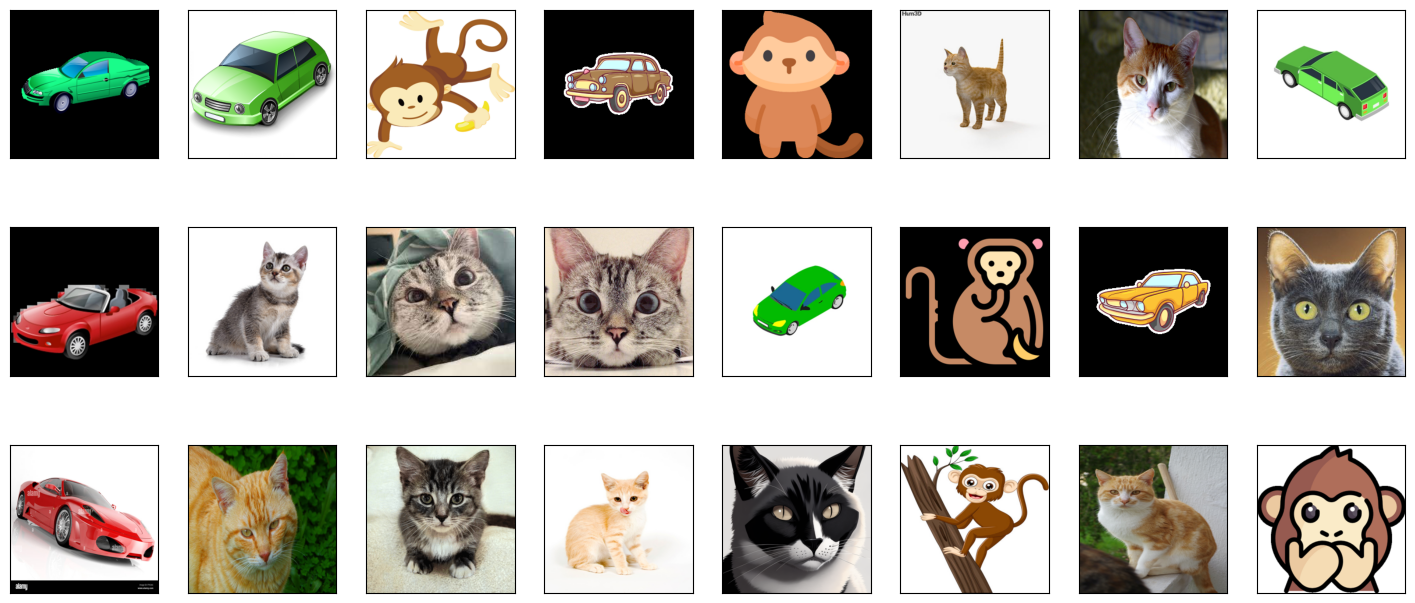

In [3]:
sample_size = 24


plotimgs = copy.deepcopy(images)
numpy.random.shuffle(plotimgs)
rows = plotimgs[:sample_size]

_, subplots = plt.subplots(nrows = math.ceil(sample_size/8), ncols = 8, figsize=(18, int(sample_size/3)))
subplots = subplots.flatten()
for i, x in enumerate(rows):
    subplots[i].imshow(numpy.reshape(x, [size, size, 3]))
    subplots[i].set_xticks([])
    subplots[i].set_yticks([])

# 🛠️ Preprocessing
Given that this case uses images, there is no such thing as feature selection because one cannot select some pixels to be better indicators than other pixels beforehand. Therefore, there is little to do in terms of preprocessing other than splitting the dataset into a trainset and testset.

🪓 Splitting into train/test

A split of 70%/30% is chosen here in order to have a fairly large number of testing images. 

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=.3, random_state=0)

# 🧬 Modelling

In this step the model will be fitted with the trainset only. In this case a [Support Vector Machine for classification](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html).

In [5]:
from sklearn.svm import SVC

# Original code
model = SVC(C=3.0)
model.fit(X_train, y_train)  

# Try C=0.5
model_c_0_5 = SVC(C=0.5)
model_c_0_5.fit(X_train, y_train)

# Try C=2.0
model_c_2_0 = SVC(C=2)
model_c_2_0.fit(X_train, y_train)

# Calculate accuracy for each model
score_default = model.score(X_test, y_test)
score_c_0_5 = model_c_0_5.score(X_test, y_test)
score_c_2_0 = model_c_2_0.score(X_test, y_test)

print("Accuracy (Default = 3):", score_default)
print("Accuracy (C=0.5):", score_c_0_5)
print("Accuracy (C=2):", score_c_2_0)

# Original code with RBF kernel
model_rbf = SVC(C=2)
model_rbf.fit(X_train, y_train) 

# Try linear kernel
model_linear = SVC(kernel='linear')
model_linear.fit(X_train, y_train)

# Try polynomial kernel 
model_poly = SVC(kernel='poly', degree=3, C=3)
model_poly.fit(X_train, y_train)

# Try sigmoid kernel
model_sigmoid = SVC(kernel='sigmoid', coef0=0.0, gamma=0.1)
model_sigmoid.fit(X_train, y_train)

# Calculate accuracy for each model
score_rbf = model_rbf.score(X_test, y_test)
score_linear = model_linear.score(X_test, y_test)
score_poly = model_poly.score(X_test, y_test)
score_sigmoid = model_sigmoid.score(X_test, y_test)

# Print accuracy for each kernel
print("Accuracy (RBF Kernel):", score_rbf)
print("Accuracy (Linear Kernel):", score_linear)
print("Accuracy (Polynomial Kernel):", score_poly)
print("Accuracy (Sigmoid Kernel):", score_sigmoid)

Accuracy (Default = 3): 0.8095238095238095
Accuracy (C=0.5): 0.47619047619047616
Accuracy (C=2): 0.8095238095238095
Accuracy (RBF Kernel): 0.8095238095238095
Accuracy (Linear Kernel): 0.5238095238095238
Accuracy (Polynomial Kernel): 0.5238095238095238
Accuracy (Sigmoid Kernel): 0.23809523809523808


# 🔬 Evaluation
Below a classification report is printed. This shows for every one of the classes how well the model performed.

In [6]:
from sklearn.metrics import classification_report
predictions = model.predict(X_test)
report = classification_report(y_test, predictions)
print(report)

              precision    recall  f1-score   support

         Car       1.00      0.73      0.84        11
         Cat       0.83      1.00      0.91         5
      Monkey       0.57      0.80      0.67         5

    accuracy                           0.81        21
   macro avg       0.80      0.84      0.81        21
weighted avg       0.86      0.81      0.82        21



It appears that Mewtwo is fairly hard to recognize, but the others all seem well. The code below will plot every pokemon in the testset, including the predicted label as well as whether this was correct or wrong.

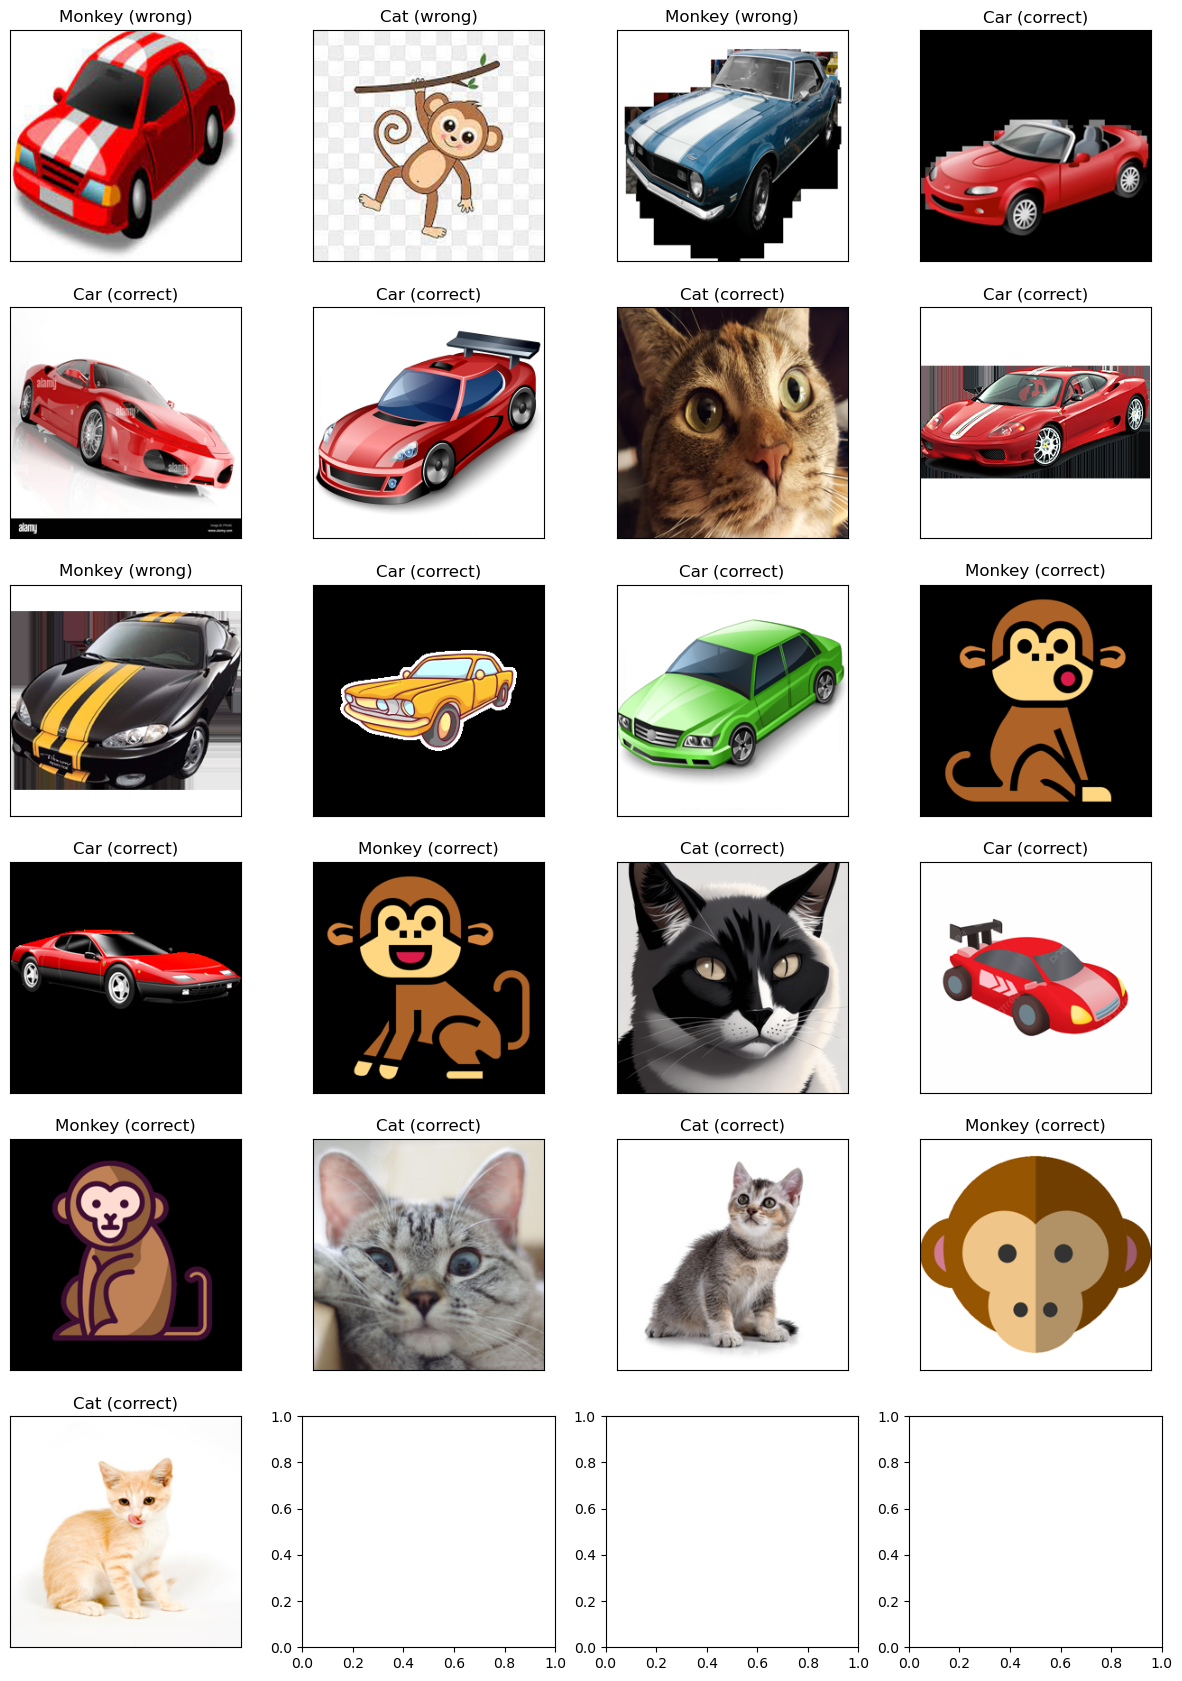

In [7]:
_, subplots = plt.subplots(nrows = math.ceil(len(X_test)/4), ncols = 4, figsize=(15, len(X_test)))
subplots = subplots.flatten()

for i, x in enumerate(X_test):
    subplots[i].imshow(numpy.reshape(x, [size, size, 3]))
    subplots[i].set_xticks([])
    subplots[i].set_yticks([])
    subplots[i].set_title(predictions[i] + (" (correct)" if predictions[i] == y_test[i] else " (wrong)"))

Even a relatively simple Support Vector Machine with just minutes of training time can do reasonably well at image recognition. Surely a deep learning CNN would perhaps do even better, but also at largely increased need for training resources and time. Probably, when the number of Pokemon increases and others with similar colours will be added this model's quality is likely to decrease quite rappidly, but then maybe also the quality of the images should be improved to help the machine. For example, the current images are of rather poor resolution and some even have significant background noise. Having cleaner, high quality, high resolution images may improve the general outcome.